# CSE 252A Computer Vision I Fall 2021 - Assignment 2

## Instructor: Ben Ochoa

- Assignment Published On: **Wed, Oct. 20, 2021**.

- Due On: **Wed, Nov. 3, 2021 11:59 PM (Pacific Time)**.

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu/courses/29614).

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances. 

## Problem 1 Image filtering [15 pts]

### Problem 1.1 Implementing Convolution[5 pts]


In this problem, you will implement the convolution filtering operation in NumPy.

As shown in the lecture, a convolution can be considered as a sliding window that computes a sum of the pixel values weighted by the flipped kernel. Your version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute a weighted sum of the neighborhood at each pixel.

#### Problem 1.1.1  [1 pts]
First you will want to implement the **zero_pad** function.

In [362]:
import numpy as np
from time import time
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt

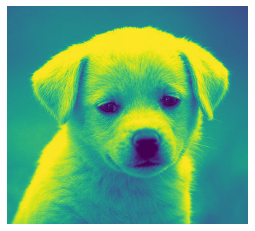

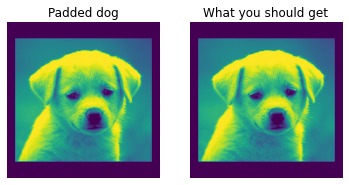

In [363]:
def zero_pad(image, pad_top, pad_down, pad_left, pad_right):
    """ Zero-pad an image.

    Ex: a 1x1 image [[1]] with pad_top = 1, pad_down = 1, pad_left = 2, pad_right = 2 becomes:

        [[0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0]]         of shape (3, 5)

    Args:
        image: numpy array of shape (H, W)
        pad_left: width of the zero padding to the left of the first column
        pad_right: width of the zero padding to the right of the last column
        pad_top: height of the zero padding above the first row
        pad_down: height of the zero padding below the last row

    Returns:
        out: numpy array of shape (H + pad_top + pad_down, W + pad_left + pad_right)
    """
    height, width = image.shape
    top_added = np.vstack((np.zeros((pad_top,width)),image))
    bottom_added = np.vstack((top_added,np.zeros((pad_down,width))))
    left_added = np.hstack((np.zeros((height+pad_top+pad_down,pad_left)),bottom_added))
    out = np.hstack((left_added,np.zeros((height+pad_top+pad_down,pad_right))))

    return out

# Open image as grayscale
img = io.imread('dog.jpg', as_gray=True)

# Show image
plt.imshow(img)
plt.axis('off')
plt.show()

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_height, pad_width, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_gray=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.2 [2 pts]
Now implement the function **`conv`**, **using at most 2 loops**. This function should take an image $f$ and a kernel $h$ as inputs and output the convolved image $(f*h)$ that has the same shape as the input image (use zero padding to accomplish this). Depending on the computer, your implementation should take around a second or less to run.


took 0.839921 seconds.


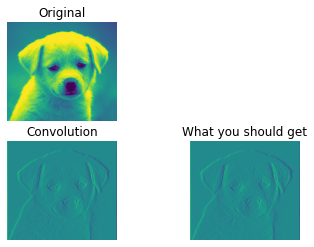

In [364]:
def conv(image, kernel):
    """ An efficient implementation of a convolution filter.

    This function uses element-wise multiplication and np.sum()
    to efficiently compute a weighted sum of the neighborhood at each
    pixel.

    Hints:
        - Use the zero_pad function you implemented above
        - You should need at most two nested for-loops
        - You may find np.flip() and np.sum() useful
        - You need to handle both odd and even kernel size

    Args:
        image: numpy array of shape (Hi, Wi)
        kernel: numpy array of shape (Hk, Wk)

    Returns:
        out: numpy array of shape (Hi, Wi)
    """
    Hi, Wi = image.shape
    Hk, Wk = kernel.shape
    out = np.zeros((Hi, Wi))
    if Hk % 2 == 1:
        pad_top = (Hk-1)//2
        pad_down = (Hk-1)//2
    if Hk % 2 == 0:
        pad_top = Hk//2
        pad_down = pad_top-1
    if Wk % 2 == 1:
        pad_left = (Wk-1)//2
        pad_right = (Wk-1)//2
    if Wk % 2 == 0:
        pad_left = Wk//2
        pad_right = pad_left-1
    padded_img = zero_pad(image, pad_top, pad_down, pad_left, pad_right)
    out = np.zeros((Hi,Wi))
    kernel = np.flipud(np.fliplr(kernel))
    for h in range(Hi):
       for w in range(Wi):
           out[h][w] = np.sum(kernel*padded_img[h:h+Hk,w:w+Wk])


    return out


# Simple convolution kernel.
# Feel free to change the kernel and to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

t1 = time()
out = conv(img, kernel)
t2 = time()
print("took %f seconds." % (t2 - t1))

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)

plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convolved_dog.jpg', as_gray=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

#### Problem 1.1.3 [1 pt]
Now let's filter some images! Here, you will apply the convolution function that you just implemented in order to bring about some interesting image effects. More specifically, we will use convolution to blur and sharpen our images.

First we will apply convolution for image blurring. To accomplish this, convolve the dog image with a 7x7 Gaussian filter for $\sigma = 1.0$. You can use the included function to obtain the Gaussian kernel.

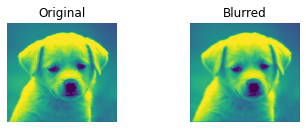

In [365]:
def gaussian2d(filter_size=7, sig=1.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def blur_image(img):
    """Blur the image by convolving with a Gaussian filter."""
    kernel = gaussian2d(filter_size=7,sig=1.0)
    blurred_img = conv(img,kernel)
    
    return blurred_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot blurred image
plt.subplot(2,2,2)
plt.imshow(blur_image(img))
plt.title('Blurred')
plt.axis('off')
plt.show()

#### Problem 1.1.4 [1 pt]
Next, we will use convolution to sharpen the images. Convolve the image with the following filter to produce a sharpened result. For convenience, we have defined the filter for you:


In [366]:
sharpening_kernel = np.array([
    [1, 4,     6,  4, 1],
    [4, 16,   24, 16, 4],
    [6, 24, -476, 24, 6],
    [4, 16,   24, 16, 4],
    [1,  4,    6,  4, 1],
]) * -1.0 / 256.0

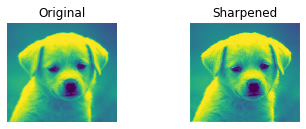

In [367]:
def sharpen_image(img):
    """Sharpen the image by convolving with a sharpening filter."""
    sharpened_img = conv(img,sharpening_kernel)
    return sharpened_img

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img, vmin=0.0, vmax=1.0)
plt.title('Original')
plt.axis('off')

# Plot sharpened image
plt.subplot(2,2,2)
plt.imshow(sharpen_image(img), vmin=0.0, vmax=1.0)
plt.title('Sharpened')
plt.axis('off')

plt.show()

### Problem 1.2: Convolution Theory  [5 pts]
#### Problem 1.2.1 [2 pts]
Consider (1) smoothing an image with a 3x3 box filter and then computing the derivative in the x-direction. Also consider (2) computing the derivative first, then smoothing. What is a single convolution kernel that will simultaneously implement both (1) and (2)? Try to give a brief justification for how you arrived at the kernel.

Use the x-derivative filter  $$[-1/2,0,1/2]$$ for this problem.


As convolution is associative, we can find a common convolution kernel for the implementation of the two cases. To do this, we would need to do a full convolution of the derivative filter and the 3x3 box filter, so that it will be the same either way of doing the operation. We use the 3x3 box blur filter $$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$ to get $$\begin{bmatrix} -\frac{1}{2} & 0 & \frac{1}{2}\end{bmatrix}*\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} = \frac{1}{18}\begin{bmatrix} -1 & -1 & 0 & 1 & 1 \\ -1 & -1 & 0 & 1 & 1 \\ -1 & -1 & 0 & 1 & 1 \end{bmatrix}.$$

I calculated the kernel using the conv2 function in MATLAB.

#### Problem 1.2.2 [3 pts]
Certain 2D filters can be expressed as a convolution of two 1D filters. Such filters are called separable filters. Give an example of a 3x3 separable filter and compare the number of arithmetic operations it takes to
convolve an n x n image using that filter before and after separation. Count both, the number of multiplication and addition operations in each case.

Assume that the convolution of the image and filter is performed in "valid" mode, i.e., the image is not padded before convolution.

An example of a 3x3 separable filter is the 2D smoothing filter $$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$ which can be separated into $$\frac{1}{3}\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} * \frac{1}{3}\begin{bmatrix} 1 & 1 & 1 \end{bmatrix}$$.

Before separating the filter, we would need to do 9 multiplications and 8 additions (9 multiplications, the 8 additions to sum the multiplications together) for each pixel in the n x n picture. In total: $9n^2$ multiplication operations and $8n^2$ addition operations.

After separating, for each of the filters, we would need 3 multiplications for each pixel and adding the multiplications together with 2 additions. In total: $6n^2$ multiplication operations and $4n^2$ addition operations. 

### Problem 1.3 Template Matching [5 pts]
Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Luckily, you have learned in CSE 252A (or are learning right now) that convolution can be used for template matching: a template g is multiplied with regions of a larger image f to measure how similar each region is to the template. Note that you will want to flip the filter before giving it to your convolution function, so that it is overall not flipped when making comparisons. You will also want to subtract off the mean value of the image or template (whichever you choose, subtract the same value from both the image and template) so that our solution is not biased toward higher-intensity (white) regions.

The template of a product (template.jpg) and the image of the shelf (shelf.jpg) is provided. We will use convolution to find the product in the shelf.

<img src="template.jpg" alt="template" width="25px"/>
<img src="shelf.jpg" alt="shelf" width="600px"/>


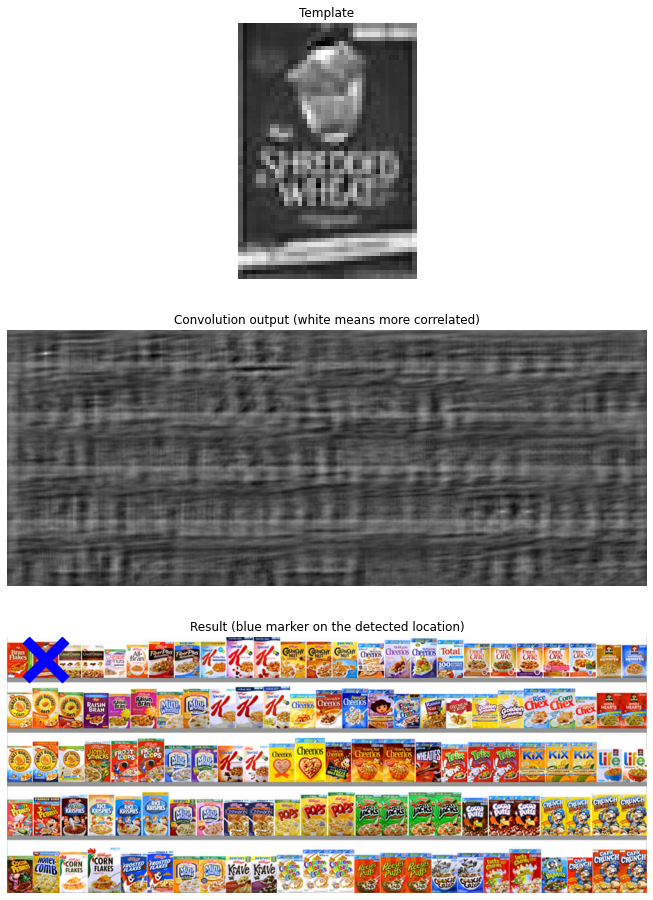

In [368]:
# Load template and image in grayscale
img = io.imread('shelf.jpg')
img_gray = io.imread('shelf.jpg', as_gray=True)
temp = io.imread('template.jpg')
temp_gray = io.imread('template.jpg', as_gray=True)

# Perform a convolution between the image and the template and store 
# the result in the out variable
img_gray -= np.mean(temp_gray)
temp_gray -= np.mean(temp_gray)
flipped_temp_gray = np.flipud(np.fliplr(temp_gray))
out = conv(img_gray,flipped_temp_gray)
brightest = []
max_value = 0
for h in range(out.shape[0]):
    for w in range(out.shape[1]):
        value = out[h][w]
        if value > max_value:
            max_value = value
            brightest = [h,w]
x,y = brightest[1],brightest[0]

# Display product template
plt.figure(figsize=(20,16))
plt.subplot(3, 1, 1)
plt.imshow(temp_gray, cmap="gray")
plt.title('Template')
plt.axis('off')

# Display convolution output
plt.subplot(3, 1, 2)
plt.imshow(out, cmap="gray")
plt.title('Convolution output (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img, cmap="gray")
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()

## Problem 2: Edge detection [21 pts]

In this problem, you will write a function to perform Canny edge detection. The following steps need to be implemented.

### Problem 2.1 Smoothing [1 pt]
First, we need to smooth the images in order to prevent noise from being considered as edges. For this assignment, use a 9x9 Gaussian kernel filter with $\sigma = 1.4$ to smooth the images.

In [369]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.signal import convolve
%matplotlib inline
import math

import matplotlib
matplotlib.rcParams['figure.figsize'] = [5, 5]

In [370]:
def gaussian2d(filter_size=None, sig=None):
    """Creates a 2D Gaussian kernel with
    side length `filter_size` and a sigma of `sig`."""
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

In [374]:
def smooth(image,windowsize,sig):
    kernel = gaussian2d(filter_size=windowsize,sig=sig)
    smoothed = conv(image,kernel)
    return smoothed
    

Original:


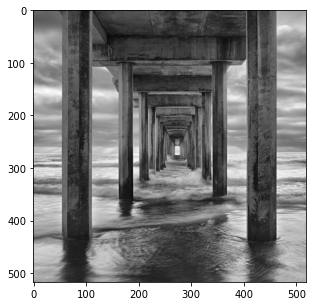

Smoothed:


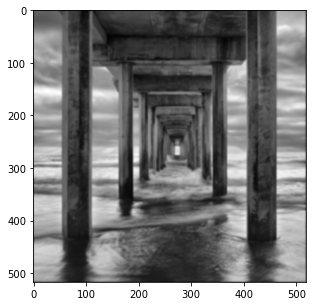

In [375]:
# Load image in grayscale
image = io.imread('sio_pier.jpg', as_gray=True)
assert len(image.shape) == 2, 'image should be grayscale; check your Python/skimage versions'
smoothed = smooth(image,9,1.4)
print('Original:')
plt.imshow(image, cmap=cm.gray)
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap=cm.gray)
plt.show()

### Problem 2.2 Gradient Computation [5 pts]
After you have finished smoothing, find the image gradient in the horizontal and vertical directions. Compute the gradient magnitude image as $|G| = \sqrt{G_x^2 + G_y^2}$. The edge direction for each pixel is given by $G_\theta = \tan^{-1}\left(\frac{G_y}{G_x}\right)$.

In [787]:
def gradient(image):
    height, width = image.shape
    g_mag = np.zeros_like(image)
    g_theta = np.zeros_like(image)
    Gx = 0
    Gy = 0
    for y in range(height):
        for x in range(width):
            if x == 0:
                Gx = image[y][x+1]-0
            if x == width-1:
                Gx = 0-image[y][x-1]
            else:
                Gx = image[y][x+1]-image[y][x-1]
            if y == 0:
                Gy = image[y+1][x]-0
            if y == height-1:
                Gy = 0-image[y-1][x]
            else:
                Gy = image[y+1][x]-image[y-1][x]
            g_mag[y][x] = np.sqrt(np.square(Gx)+np.square(Gy))
            g_theta[y][x] = math.atan2(Gy,Gx)
    return g_mag, g_theta

Gradient magnitude:


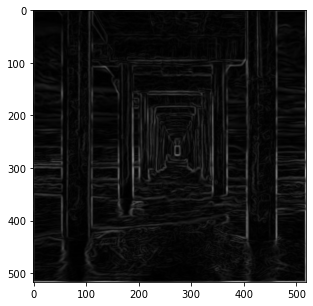

In [788]:
g_mag, g_theta = gradient(smoothed)
print('Gradient magnitude:')
plt.imshow(g_mag, cmap=cm.gray)
plt.show()

### Problem 2.3 Non-Maximum Suppression [7 pts]
We would like our edges to be sharp, unlike the ones in the gradient image. Use non-maximum suppression to preserve all local maxima and discard the rest. You can use the following method to do so:

  - For each pixel in the gradient magnitude image:
    - Round the gradient direction $\theta$ to the nearest multiple of $45^{\circ}$ (which we will refer to as $ve$).
    - Compare the edge strength at the current pixel to the pixels along the $+ve$ and $-ve$ gradient direction in the 8-connected neighborhood.
    - If the pixel does not have a larger value than both of its two neighbors in the $+ve$ and $-ve$ gradient directions, suppress the pixel's value (set it to 0). By following this process, we preserve the values of only those pixels which have maximum gradient magnitudes in the neighborhood along the $+ve$ and $-ve$ gradient directions.
  - Return the result as the NMS response.

In [764]:
def nms(g_mag,g_theta):
    nms_response = g_mag
    height, width = nms_response.shape
    for y in range(1,height-1):
        for x in range(1,width-1):
            g_theta[y][x] = round(g_theta[y][x]/(np.pi/4))*np.pi/4
            if (g_theta[y][x] == 0 or g_theta[y][x] == np.pi or g_theta[y][x] == -np.pi):
                if (g_mag[y][x] < g_mag[y][x+1] or g_mag[y][x] < g_mag[y][x-1]):
                        nms_response[y][x] = 0
            if (g_theta[y][x] == np.pi/4 or g_theta[y][x] == (np.pi/4 + np.pi) or g_theta[y][x] == (np.pi/4 - np.pi)):
                if (g_mag[y][x] < g_mag[y-1][x+1] or g_mag[y][x] < g_mag[y+1][x-1]):
                        nms_response[y][x] = 0
            if (g_theta[y][x] == 3*np.pi/4 or g_theta[y][x] == (3*np.pi/4 + np.pi) or g_theta[y][x] == (3*np.pi/4 - np.pi)):
                if (g_mag[y][x] < g_mag[y+1][x+1] or g_mag[y][x] < g_mag[y-1][x-1]):
                        nms_response[y][x] = 0
            if (g_theta[y][x] == np.pi/2 or g_theta[y][x] == (np.pi/2 + np.pi) or g_theta[y][x] == (np.pi/2 - np.pi)):
                if (g_mag[y][x] < g_mag[y-1][x] or g_mag[y][x] < g_mag[y+1][x]):
                        nms_response[y][x] = 0
    return nms_response


NMS:


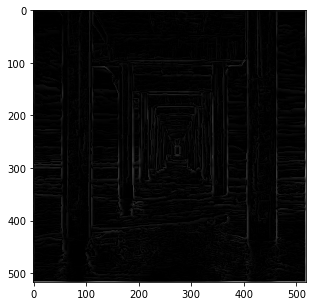

In [481]:
nms_image = nms(g_mag, g_theta)
print('NMS:')
plt.imshow(nms_image, cmap=cm.gray)
plt.show()

### Problem 2.4 Hysteresis Thresholding [8 pts]
Choose suitable values of thresholds and use the thresholding approach decribed in lecture 6. This will remove the edges caused by noise and color variations.

  - Define two thresholds `t_min` and `t_max`. 
  - If the `nms > t_max`, then we select that pixel as an edge.
  - If `nms < t_min`, we reject that pixel.
  - If `t_min < nms < t_max`, we select the pixel only if there is a path from to another pixel with `nms > t_max`. (Hint: Think of all pixels with `nms > t_max` as starting points and run BFS/DFS from these starting points).
  - The choice of value of low and high thresholds depends on the range of values in the gradient magnitude image. You can start by setting the high threshold to some percentage of the max value in the gradient magnitude image, e.g. thres_high = 0.2 * image.max(), and the low threshold to some percentage of the high threshold, e.g. thres_low = 0.85 * thres_high. And then you can tune those values however you want.

In [482]:
def hysteresis(image, y, x, g_theta, t_max):
    val = 0
    g_theta = round(g_theta/(np.pi/4))*np.pi/4
    if (g_theta == 0 or g_theta == np.pi or g_theta == -np.pi):
        max_val1 = 0
        max_val2 = 0
        try:
            max_val1 = image[y+1][x]
        except IndexError:
            pass
        try: 
            max_val2 = image[y-1][x]
        except IndexError:
            pass
        if max_val1 > t_max and max_val2 > t_max:
            val = 1
        else:
            val = 0
        
    if (g_theta == np.pi/4 or g_theta == (np.pi/4 + np.pi) or g_theta == (np.pi/4 - np.pi)):
        max_val1 = 0
        max_val2 = 0
        try:
            max_val1 = image[y-1][x-1]
        except IndexError:
            pass
        try: 
            max_val2 = image[y+1][x+1]
        except IndexError:
            pass
        if max_val1 > t_max and max_val2 > t_max:
            val = 1
        else:
            val = 0

    if (g_theta == 3*np.pi/4 or g_theta == (3*np.pi/4 + np.pi) or g_theta == (3*np.pi/4 - np.pi)):
        max_val1 = 0
        max_val2 = 0
        try:
            max_val1 = image[y-1][x+1]
        except IndexError:
            pass
        try: 
            max_val2 = image[y+1][x-1]
        except IndexError:
            pass
        if max_val1 > t_max and max_val2 > t_max:
            val = 1
        else:
            val = 0

    if (g_theta == np.pi/2 or g_theta == (np.pi/2 + np.pi) or g_theta == (np.pi/2 - np.pi)):
        max_val1 = 0
        max_val2 = 0
        try:
            max_val1 = image[y][x+1]
        except IndexError:
            pass
        try:
            max_val2 = image[y][x-1]
        except IndexError:
            pass
        if max_val1 > t_max and max_val2 > t_max:
            val = 1
        else:
            val = 0
    return val

def hysteresis_threshold(image, g_theta, use_g_theta=False):
    result = np.zeros_like(image)
    t_max = 0.2 * image.max()
    t_min = 0.85 * t_max
    height, width = image.shape
    for y in range(height-1):
        for x in range(width-1):
            if image[y][x] <= t_min:
                result[y][x] = 0
            if image[y][x] >= t_max:
                result[y][x] = 1
            else:
                val = hysteresis(image,y,x,g_theta[y][x],t_max)
                result[y][x] = val

    return result

Thresholded:


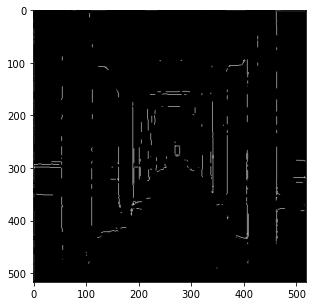

In [483]:
thresholded = hysteresis_threshold(nms_image, g_theta)
print('Thresholded:')
plt.imshow(thresholded, cmap=cm.gray)
plt.show()

## Problem 3 Corner detection [13 pts]

### Problem 3.1 [12 pts]
In this problem, we are going to build a corner detector. This should be done according to the lecture slides. You should fill in the function <code>corner_detect</code> below, which takes as input <code>image, nCorners, smoothSTD, windowSize</code> -- where `smoothSTD` is the standard deviation of the smoothing kernel and `windowSize` is the window size for corner detector and non-maximum suppression. In the lecture, the corner detector was implemented using a hard threshold. Do not do that; instead, return the `nCorners` strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with `nCorners` = 20) and display outputs as shown below. You may find `scipy.ndimage.filters.gaussian_filter` helpful for smoothing.

In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughout all of the experiments in this assignment.

There will be a total of 16 images as outputs: 4 choices of `smoothSTD` x 2 `matrix` images x 2 `warrior` images.

![dinoCorner1](dinoCorner1.png)
![dinoCorner2](dinoCorner2.png)



In [468]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import imageio
from scipy.signal import convolve

def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [484]:
def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non-maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """
    image = gaussian_filter(image,sigma=smoothSTD)
    height, width = image.shape
    gy, gx = np.gradient(image)

    Ixx = gx**2
    Ixy = gx*gy
    Iyy = gy**2
    R = np.zeros_like(image)
    for y in range(height-windowSize):
        for x in range(width-windowSize):
            w1 = Ixx[y:y+windowSize, x:x+windowSize]
            w2 = Ixy[y:y+windowSize, x:x+windowSize]
            w3 = Iyy[y:y+windowSize, x:x+windowSize]
            M = np.array(([np.sum(w1),np.sum(w2)],[np.sum(w2),np.sum(w3)]))
            R[y][x] = min(np.linalg.eigvals(M))

    corners = np.zeros((nCorners,2))
    pad = ((windowSize-1))//2

    possible_corners = np.array([[-1, -1]])
    corner_values = np.array([0])
            
    for y in range(pad, image.shape[0]-pad):
        for x in range(pad, image.shape[1]-pad):
            temp = R[y-pad:y+pad+1, x-pad:x+pad+1]
            if temp[pad][pad] == np.max(temp):
                corner_values = np.row_stack((corner_values, [R[y][x]]))
                possible_corners = np.row_stack((possible_corners, [x, y]))

    unique_corner_values = np.unique(corner_values)
    thres = unique_corner_values[-nCorners]
    x,y = np.where(corner_values > thres)
    corners = possible_corners[x]

    return corners

smooth stdev: 0.5
window size: 3


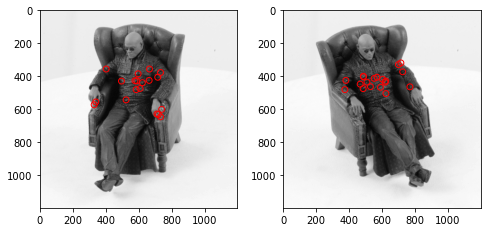

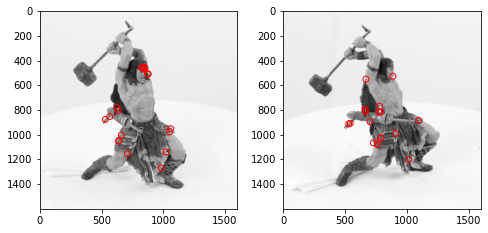

smooth stdev: 1
window size: 7


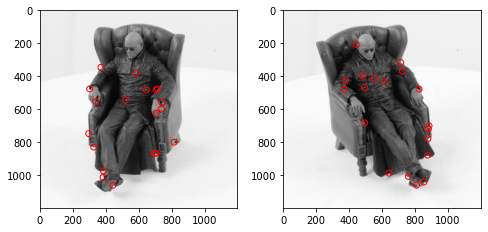

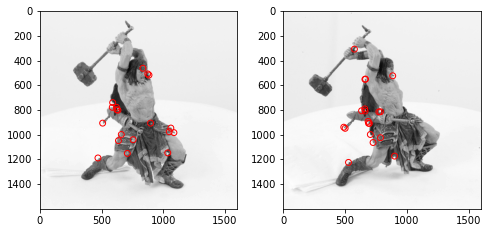

smooth stdev: 2
window size: 13


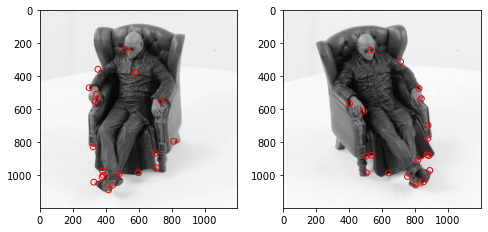

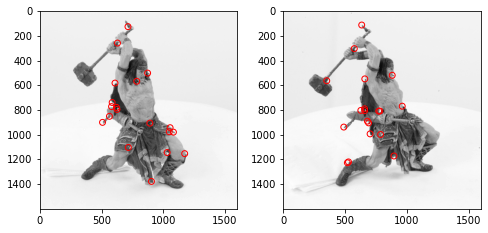

smooth stdev: 4
window size: 25


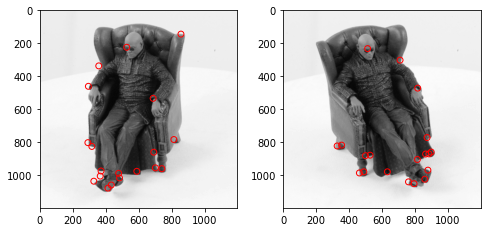

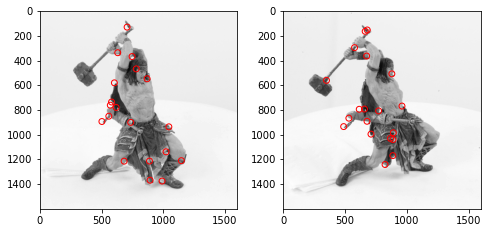

In [485]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=35, edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=35, edgecolors='r', facecolors='none')
    plt.show()

for smoothSTD in (0.5, 1, 2, 4):
    windowSize = int(smoothSTD * 6)
    if windowSize % 2 == 0:
        windowSize += 1
        
    print('smooth stdev: %r' % smoothSTD)
    print('window size: %r' % windowSize)

    nCorners = 20

    # read images and detect corners on images
    
    imgs_din = []
    crns_din = []
    imgs_mat = []
    crns_mat = []
    imgs_war = []
    crns_war = []
    
    for i in range(2):
        #img_din = imageio.imread('dino/dino' + str(i) + '.png')
        #imgs_din.append(rgb2gray(img_din))
        # downsize your image in case corner_detect runs slow in test
        #imgs_din.append(rgb2gray(img_din)[::2, ::2])
        #crns_din.append(corner_detect(imgs_din[i], nCorners, smoothSTD, windowSize))

        img_mat = imageio.imread('matrix/matrix' + str(i) + '.png')
        imgs_mat.append(rgb2gray(img_mat))
        # downsize your image in case corner_detect runs slow in test
        #imgs_mat.append(rgb2gray(img_mat)[::2, ::2])
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, smoothSTD, windowSize))

        img_war = imageio.imread('warrior/warrior' + str(i) + '.png')
        imgs_war.append(rgb2gray(img_war))
        # downsize your image in case corner_detect runs slow in test
        #imgs_war.append(rgb2gray(img_war)[::2, ::2])
        crns_war.append(corner_detect(imgs_war[i], nCorners, smoothSTD, windowSize))

    #show_corners_result(imgs_din, crns_din)
    show_corners_result(imgs_mat, crns_mat)
    show_corners_result(imgs_war, crns_war)

### Problem 3.2 [1 pts]
Comment on your results and observations. You don't need to comment per output; just discuss any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pairs of images (warrior and matrix). Also discuss whether you are able to find corresponding corners for the pairs of images.



The corners seem to be more spread around the whole person in the images as the values of windowSize and smoothing increases. They are also further from each other and more evenly spaced around the figures, for the most part. There are distinct areas in the two images that are corresponding in the two images, for example, the feet and glasses in the matrix photo, and the handle of the axe, the face and the sword in the warrior pixture. These are features that are present in both images of the figures, and that are in especially contrasted areas of the images. 

## Problem 4 Epipolar rectification and feature matching [43 pts]

### 4.1 Epipolar rectification [22 pts]

In this problem, we are going to perform epipolar rectification. Given calibrated stereo cameras (i.e., calibration matrices $K_1$ and $K_2$, camera rotation matrices $R_1$ and $R_2$, camera translation vectors $t_1$ and $t_2$), you are expected to determine the rotation matrix $R$ and calibration matrix $K$ of the virtual cameras.
Your goal is to complete the function $epipolarRecification$, which determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two images acquired by the cameras. The destination virtual cameras have the same centers as the source real cameras. 


#### 4.1.1 Camera translation matrices and Projective Transformation matrices [6 pts]
To calculate the camera translation from cameras with the same camera center, you will have to complete the $cameraTranslation$ first. 
Another function you need to complete is $calcProjectiveTransformation$, which calculates the planar projective transformation from cameras with the same camera center.
The camera calibration matrix (same for both cameras) will be calculated by $calcDestinateK$. This is provided for you.
To get the rotation matrix $R$ of the virtual camera, we usually interpolate halfway between the two 3D rotations embodied by $R_1$ and $R_2$. For simplicity, this will be also given to you.

In [471]:
from imageio import imread
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from math import floor, ceil

In [657]:
def cameraTranslation(R1, t1, R2):
    '''
    Calculate the camera translation from cameras with the same camera center.
    
    Args: 
    R1: The rotation matrix of the first camera.
    t1: The translation vector of the first camera.
    R2: The rotation matrix of the second camera.
    
    Returns:
    The translation vector of the second camera.
    '''
    return R2@np.transpose(R1)@t1
    

In [746]:
def calcProjectiveTransformation(K1, R1, K2, R2):
    '''
    Calculates the planar projective transformation from cameras with the same camera center.
    This function determines the planar projective transformation from the image of a 3D point in the first camera to its image in the second camera where P1 = K1 * R1 * [I | -C] and P2 = K2 * R2 * [I | -C].
    
    Args:
    K1: The calibration matrix of the first camera.
    R1: The rotation matrix of the first camera.
    K2: The calibration matrix of the second camera.
    R2: The rotation matrix of the second camera.
    
    Returns:
    The transformation matrix.
    '''
    return K2@R2@np.transpose(R1)@np.linalg.inv(K1)
    

In [747]:
def calcDestinateK(srcK1, srcK2):
    '''
    Camera calibration matrix (same for both cameras)
    '''
    alpha = (srcK1[0][0] + srcK2[0][0] + srcK1[1][1] + srcK2[1][1]) // 4 
    x0 = (srcK1[0][2] + srcK2[0][2]) // 2
    y0 = (srcK1[1][2] + srcK2[1][2]) // 2
    dstK = np.zeros((3, 3))
    dstK[0][0] = alpha
    dstK[0][2] = x0
    dstK[1][1] = alpha
    dstK[1][2] = y0
    dstK[2][2] = 1
    return dstK

In [748]:
def epipolarRecification(srcK1, srcR1, src_t1, 
                         srcK2, srcR2, src_t2, dstR):
    '''
    Given two calibrated cameras, this function determines the calibration matrix and rotation matrix of both cameras, the translation vector of each of the cameras, and matching planar transformations that epipolar rectify the two image acquired by the cameras.  The destination cameras have the same centers as the source cameras.
    
    Args:
    srcK1: The calibration matrix of the first source camera.
    srcR1: The rotation matrix of the first source camera.
    src_t1: The translation vector of the first source camera.
    srcK2: The calibration matrix of the second source camera.
    srcR2: The rotation matrix of the second source camera.
    src_t2: The translation vector of the second source camera.
    dstR: The rotation matrix of the destination cameras.
    
    Returns: 
    dstK: The calibration matrix of the destination cameras.
    dst_t1: The translation vector of the first destination camera.
    dst_t2: The translation vector of the second destination camera.
    H1, H2: The image rectification transformation matrices.
    '''
    
    dst_t1 = cameraTranslation(srcR1, src_t1, dstR)
    dst_t2 = cameraTranslation(srcR2, src_t2, dstR)
    
    dstK = calcDestinateK(srcK1, srcK2)
    
    H1 = calcProjectiveTransformation(srcK1, srcR1, dstK, dstR)
    H2 = calcProjectiveTransformation(srcK2, srcR2, dstK, dstR)
   
    return dstK, dst_t1, dst_t2, H1, H2
    


#### Problem 4.1.2 Warp Image [10 pts]
After calling $epipolarRectification$, we can get the projective transformation matrices $H1$ and $H2$. Next, we will geometrically transform (i.e., 'warp') the image so that the epipolar lines are image rows. You have to complete $warpImage$ using the backward method in Lecture 7. Note the destination images are required to be the same size as the source images.

In [864]:
def to_homogeneous(pixel):
    return np.array([pixel[1],pixel[0],1])

def from_homogeneous(pixel):
    return np.array([pixel[1]/pixel[2],pixel[0]/pixel[2]])

def normalize(img):
    assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

def warpImage(image, H, out_height, out_width):
    """
    Performs the warp of the full image content.
    Calculates bounding box by piping four corners through the transformation.
    
    Args: 
    image: Image to warp
    H: The image rectification transformation matrices.
    out_height, out_width: The shape of output image.
    
    Returns:
    Out: An inverse warp of the image, given a homography.
    min_x, min_y, max_x, max_y: The minimum/maximum of warped image bound.
    """
    cs_topleft = to_homogeneous([0,0])
    cs_topright = to_homogeneous([0,image.shape[1]])
    cs_bottomleft = to_homogeneous([image.shape[0],0])
    cs_bottomright = to_homogeneous([image.shape[0],image.shape[1]])
    ct_topleft = H @ cs_topleft
    ct_topright = H @ cs_topright
    ct_bottomleft = H @ cs_bottomleft
    ct_bottomright = H @ cs_bottomright
    ct_topleft_2D = from_homogeneous(ct_topleft)
    ct_topright_2D = from_homogeneous(ct_topright)
    ct_bottomleft_2D = from_homogeneous(ct_bottomleft)
    ct_bottomright_2D = from_homogeneous(ct_bottomright)
    min_x = min(ct_topleft_2D[1],ct_topright_2D[1],ct_bottomleft_2D[1],ct_bottomright_2D[1])
    min_y = min(ct_topleft_2D[0],ct_topright_2D[0],ct_bottomleft_2D[0],ct_bottomright_2D[0])
    max_x = max(ct_topleft_2D[1],ct_topright_2D[1],ct_bottomleft_2D[1],ct_bottomright_2D[1])
    max_y = max(ct_topleft_2D[0],ct_topright_2D[0],ct_bottomleft_2D[0],ct_bottomright_2D[0])
    out = np.zeros((out_height,out_width,3))
    
    for y in range(out_height):
        for x in range(out_width):
            p_t = to_homogeneous([y,x])
            p_s = np.dot(np.linalg.inv(H),p_t)
            p_s_2D = from_homogeneous(p_s)
            if (0 < p_s_2D[0] < image.shape[0]) and (0 < p_s_2D[1] < image.shape[1]):
                out[y][x] = image[int(p_s_2D[0]),int(p_s_2D[1])]
                #out[y][x] = image[y][x]
    out = normalize(out)
    return out, min_x, min_y, max_x, max_y

In [865]:
file_param = open('param.pkl', 'rb')
param = pickle.load(file_param)
file_param.close()
srcK1, srcR1, src_t1 = param['srcK1'], param['srcR1'], param['src_t1']
srcK2, srcR2, src_t2 = param['srcK2'], param['srcR2'], param['src_t2']
dstR = param['dstR']


In [866]:
dstK, dst_t1, dst_t2, H1, H2 = epipolarRecification(srcK1, srcR1, src_t1, 
                                                    srcK2, srcR2, src_t2, dstR)

Original image 1:


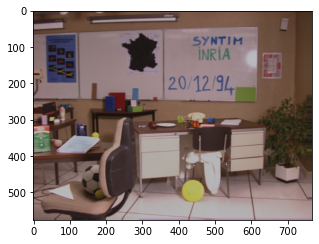

In [867]:
src1 = imread('Sport0_OG0.bmp')
plt.imshow(src1)
print('Original image 1:')

Unbounded Rectified image 1:


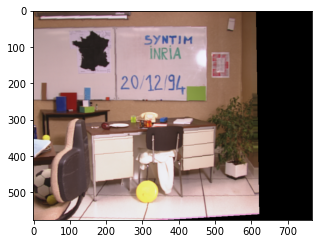

In [868]:
height1, width1, _ = src1.shape
rectified_im1_unbounded, min_x1, min_y1, max_x1, max_y1 = warpImage(src1, H1, height1, width1)
plt.imshow(rectified_im1_unbounded)
print('Unbounded Rectified image 1:')

Original image 2:


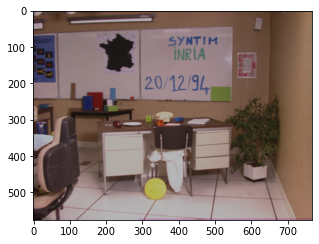

In [1050]:
src2 = imread('Sport1_OG0.bmp')
plt.imshow(src2)
print('Original image 2:')

Unbounded Rectified image 2:


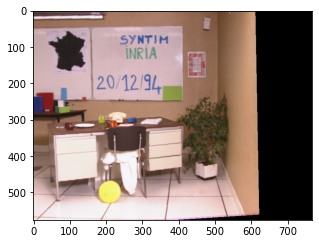

In [1051]:
height2, width2, _ = src2.shape
rectified_im2_unbounded, min_x2, min_y2, max_x2, max_y2 = warpImage(src2, H2, height2, width2)
plt.imshow(rectified_im2_unbounded)
print('Unbounded Rectified image 2:')

#### 4.1.3 Partial bounded retification [3 pts]
In the resulting images, although they are epipolar rectified, you should observe portions of the source images being transformed "out of bounds" of the destination images.
To fix this problem, we can introduced a 2D transformation containing a translation (i.e., $T1$ and $T2$). 
$$T1 = \begin{bmatrix}
1 & 0 & -min\_x1 - 0.5\\ 
0 & 1 & -min(min\_y1, min\_y2) - 0.5\\ 
0 & 0 & 1
\end{bmatrix}$$
$$T2 = \begin{bmatrix}
1 & 0 & -min\_x2 - 0.5\\ 
0 & 1 & -min(min\_y1, min\_y2) - 0.5\\ 
0 & 0 & 1
\end{bmatrix}$$
$H1$, $H2$ can be updated by left multiplying $T1$, $T2$, respectivley. Again, geometrically tranform the images under the updated $H1$, $H2$. The destination image is required to be the same size as the source images. In the resulting images, although they are (still) epipolar rectified, you should observe the portions of the source images being transformed are no longer "out of bounds" on the top and left of the destination images.

In [871]:
def partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2):
    '''
    Update the projective transformation matries so that the rectified images are no longer 'out of bound'. 
    '''
    T1 = np.array([[1,0,-min_x1-0.5],[0,1,-min(min_y1,min_y2)-0.5],[0,0,1]])
    T2 = np.array([[1,0,-min_x2-0.5],[0,1,-min(min_y1,min_y2)-0.5],[0,0,1]])
    H1_bounded = T1 @ H1
    H2_bounded = T2 @ H2
    
    return H1_bounded, H2_bounded

The partial bounded rectified image 1:


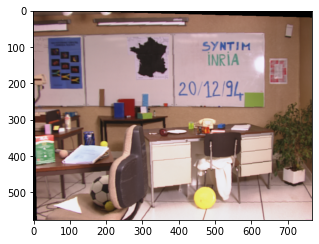

In [872]:
H1_bounded, H2_bounded = partialboundedRetification(min_x1, min_y1, min_x2, min_y2, H1, H2)
rectified_im1_bounded, min_x1_bounded, min_y1_bounded, max_x1_bounded, max_y1_bounded = warpImage(src1, H1_bounded, height1, width1)
plt.imshow(rectified_im1_bounded)
print('The partial bounded rectified image 1:')

The partial bounded rectified image 2:


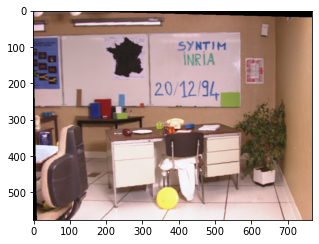

In [873]:
rectified_im2_bounded, min_x2_bounded, min_y2_bounded, max_x2_bounded, max_y2_bounded = warpImage(src2, H2_bounded, height2, width2)
plt.imshow(rectified_im2_bounded)
print('The partial bounded rectified image 2:')

#### 4.1.4 Completely bounded rectification [3 pts]
Finally, determine the size of the destination images that completely bound the transformed images. Again geometrically transform the images under the updated 2D projective transformation matrices $H1$ and $H2$ (these are not updated a second time). You should complete the function $completelyBoundedRectification$. The destination images are required to be the size you just calculated. In the resulting images, you should observe the source images being transformed such that they are epipolar rectified and are completely bounded.

In [1068]:
def completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,
                                   min_x1_bounded, max_x1_bounded, 
                                   min_y1_bounded, max_y1_bounded):
    '''
    Determine the size of the destination images (same size for both) that completely bound the transformed images. geometrically transform the images under the updated 2D projective transformation matrices H1 and H2 (these are not updated a second time).
    '''
    rectified_im1_final = np.zeros((int(max_y1_bounded-min_y1_bounded),int(max_x1_bounded-min_x1_bounded),3))
    rectified_im2_final = np.zeros((int(max_y1_bounded-min_y1_bounded),int(max_x1_bounded-min_x1_bounded),3))
    for y in range(0,int(max_y1_bounded-min_y1_bounded)):
        for x in range(0,int(max_x1_bounded-min_x1_bounded)):
            p_t = to_homogeneous([y,x])
            p_s_1 = np.dot(np.linalg.inv(H1_bounded),p_t)
            p_s_1_2D = from_homogeneous(p_s_1)
            if (min_y1_bounded < p_s_1_2D[0] < max_y1_bounded) and (min_x1_bounded < p_s_1_2D[1] < max_x1_bounded):
                # Make exception for the pixels not in bounds, setting values to zero if they are not in src img.
                try:
                    rectified_im1_final[y][x] = src1[int(p_s_1_2D[0]),int(p_s_1_2D[1])]
                except IndexError:
                    rectified_im1_final[y][x] = np.array([0,0,0])
            p_t = to_homogeneous([y,x])
            p_s_2 = np.dot(np.linalg.inv(H2_bounded),p_t)
            p_s_2_2D = from_homogeneous(p_s_2)
            if (min_y1_bounded < p_s_2_2D[0] < max_y1_bounded) and (min_x1_bounded < p_s_2_2D[1] < max_x1_bounded):
                # Make exception for the pixels not in bounds, setting values to zero if they are not in src img.
                try:
                    rectified_im2_final[y][x] = src2[int(p_s_2_2D[0]),int(p_s_2_2D[1])]
                except IndexError:
                    rectified_im1_final[y][x] = np.array([0,0,0])
                #out[y][x] = image[y][x]
    rectified_im1_final = normalize(rectified_im1_final)
    rectified_im2_final = normalize(rectified_im2_final)
    
    return rectified_im1_final, rectified_im2_final

The final bounded rectified image 1:


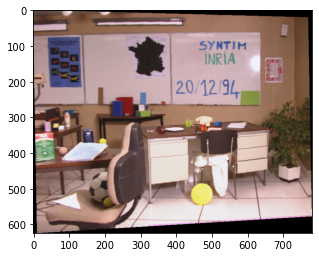

The final bounded rectified image 2:


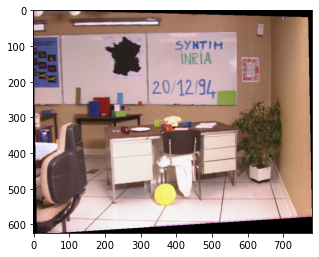

In [1069]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, H1_bounded, H2_bounded,
                                   min_x1_bounded, max_x1_bounded, 
                                   min_y1_bounded, max_y1_bounded)
plt.imshow(rectified_im1_final)
print('The final bounded rectified image 1:')
plt.show()
plt.imshow(rectified_im2_final)
print('The final bounded rectified image 2:')

### Problem 4.2 Feature matching [3 pts]
#### 4.2.1 SSD (Sum Squared Distance) Matching [1 pts]
Complete the function <code>ssdMatch</code>:  
SSD = $\sum_{x,y}|W_1(x,y)-W_2(x,y)|^2$

In [1058]:
def ssdMatch(img1, img2, c1, c2, R):
    """Compute SSD given two windows.
    
    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        SSD matching score for two input windows.
        
    """
    window_size = 2*R+1
    pad = (window_size-1)//2
    W1 = img1[c1[1]-pad:c1[1]+pad+1,c1[0]-pad:c1[0]+pad+1]
    W2 = img2[c2[1]-pad:c2[1]+pad+1,c2[0]-pad:c2[0]+pad+1]
    ssd = np.sum(np.square(W1-W2))
    return ssd

In [1059]:
# Here is the code for you to test your implementation
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 20
print(ssdMatch(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 30
print(ssdMatch(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 46

20
30
46


#### Problem 4.2.2 NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.

NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$

where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [1185]:
def normalize_window(window):
    _mean = np.mean(window)
    _stdev = np.sqrt(np.sum((window - _mean) ** 2))
    return (window - _mean) / (_stdev + 1e-6)

def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    window_size = 2*R+1
    pad = (window_size-1)//2
    _W1 = img1[c1[1]-pad:c1[1]+pad+1,c1[0]-pad:c1[0]+pad+1]
    _W2 = img2[c2[1]-pad:c2[1]+pad+1,c2[0]-pad:c2[0]+pad+1]
    W1,W2 = normalize_window(_W1), normalize_window(_W2)
    ncc = np.sum(W1*W2)
    return ncc
    

In [1145]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])

print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546

print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457

print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546545625645379
0.8457612741588395
0.6258687824662955


### Problem 4.3 Naive Matching [8 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondences. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation.

Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose the number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code.

**Properly label or mention which output corresponds to which choice of number of corners. The total number of outputs is 6 images:** (3 choices of number of corners for each of `matrix` and `warrior`), where each figure might look like the following:

**Number of corners: 10**
<img src = "dinoMatch.png" alt="dino match" width="800"/>

In [1070]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    matching = []
    n = corners1.shape[0]
    for i in range(n):
        corner1 = np.array(corners1[i])
        ncc_max = 0
        pair = None
        for j in range(n):
            corner2 = np.array(corners2[j])
            ncc_score = ncc_match(img1,img2,corner1,corner2,R)
            if ncc_score >= ncc_max:
                ncc_max = ncc_score
                pair = (corner1,corner2)
        if ncc_max >= NCCth:
            matching.append(pair)
            corners1[i] = np.array([1000000,1000000])
        
    return matching

In [1077]:
# detect corners on warrior and matrix sets
# you are free to modify code here, create your helper functions, etc.

nCorners = 10  # do this for 10, 20 and 30 corners
smoothSTD = 14
windowSize = 15

# read images and detect corners on images

imgs_mat1 = []
crns_mat1 = []
imgs_war1 = []
crns_war1 = []
imgs_mat2 = []
crns_mat2 = []
imgs_war2 = []
crns_war2 = []
imgs_mat3 = []
crns_mat3 = []
imgs_war3 = []
crns_war3 = []

for i in range(2):
    img_mat1 = imageio.imread('matrix/matrix' + str(i) + '.png')
    imgs_mat1.append(rgb2gray(img_mat1))
    # downsize your image in case corner_detect runs slow in test
    #imgs_mat1.append(rgb2gray(img_mat1)[::4, ::4])
    crns_mat1.append(corner_detect(imgs_mat1[i], nCorners, smoothSTD, windowSize))

    img_war1 = imageio.imread('warrior/warrior' + str(i) + '.png')
    imgs_war1.append(rgb2gray(img_war1))
    # downsize your image in case corner_detect runs slow in test
    #imgs_war1.append(rgb2gray(img_war1)[::4, ::4])
    crns_war1.append(corner_detect(imgs_war1[i], nCorners, smoothSTD, windowSize))

nCorners = 20  # do this for 10, 20 and 30 corners
smoothSTD = 14
windowSize = 15

for i in range(2):
    img_mat2 = imageio.imread('matrix/matrix' + str(i) + '.png')
    imgs_mat2.append(rgb2gray(img_mat2))
    # downsize your image in case corner_detect runs slow in test
    #imgs_mat2.append(rgb2gray(img_mat2)[::4, ::4])
    crns_mat2.append(corner_detect(imgs_mat2[i], nCorners, smoothSTD, windowSize))

    img_war2 = imageio.imread('warrior/warrior' + str(i) + '.png')
    imgs_war2.append(rgb2gray(img_war2))
    # downsize your image in case corner_detect runs slow in test
    #imgs_war2.append(rgb2gray(img_war2)[::4, ::4])
    crns_war2.append(corner_detect(imgs_war2[i], nCorners, smoothSTD, windowSize))
    
nCorners = 30  # do this for 10, 20 and 30 corners
smoothSTD = 14
windowSize = 15

for i in range(2):
    img_mat3 = imageio.imread('matrix/matrix' + str(i) + '.png')
    imgs_mat3.append(rgb2gray(img_mat3))
    # downsize your image in case corner_detect runs slow in test
    #imgs_mat3.append(rgb2gray(img_mat3)[::4, ::4])
    crns_mat3.append(corner_detect(imgs_mat3[i], nCorners, smoothSTD, windowSize))

    img_war3 = imageio.imread('warrior/warrior' + str(i) + '.png')
    imgs_war3.append(rgb2gray(img_war3))
    # downsize your image in case corner_detect runs slow in test
    #imgs_war3.append(rgb2gray(img_war3)[::4, ::4])
    crns_war3.append(corner_detect(imgs_war3[i], nCorners, smoothSTD, windowSize))

In [1078]:
# match corners
R = 15
NCCth_mat = 0.1
NCCth_war = 0.2  # put your threshold here
matching_mat1 = naive_matching(imgs_mat1[0]/255,
                                imgs_mat1[1]/255, 
                                crns_mat1[0], 
                                crns_mat1[1], 
                                R, NCCth_mat)
matching_war1 = naive_matching(imgs_war1[0]/255,
                                imgs_war1[1]/255, 
                                crns_war1[0], 
                                crns_war1[1], 
                                R, NCCth_war)
matching_mat2 = naive_matching(imgs_mat2[0]/255,
                                imgs_mat2[1]/255, 
                                crns_mat2[0], 
                                crns_mat2[1], 
                                R, NCCth_mat)
matching_war2 = naive_matching(imgs_war2[0]/255,
                                imgs_war2[1]/255, 
                                crns_war2[0], 
                                crns_war2[1], 
                                R, NCCth_war)
matching_mat3 = naive_matching(imgs_mat3[0]/255,
                                imgs_mat3[1]/255, 
                                crns_mat3[0], 
                                crns_mat3[1], 
                                R, NCCth_mat)
matching_war3 = naive_matching(imgs_war3[0]/255,
                                imgs_war3[1]/255, 
                                crns_war3[0], 
                                crns_war3[1], 
                                R, NCCth_war)

Number of Corners: 10


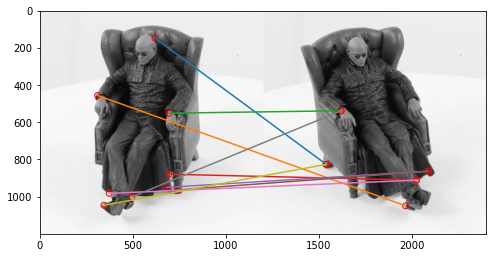

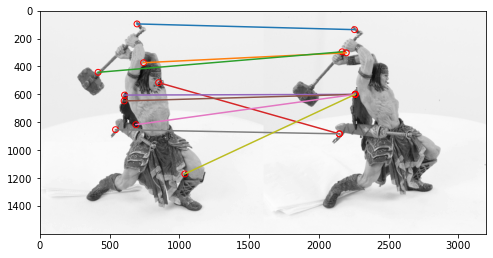

Number of Corners: 20


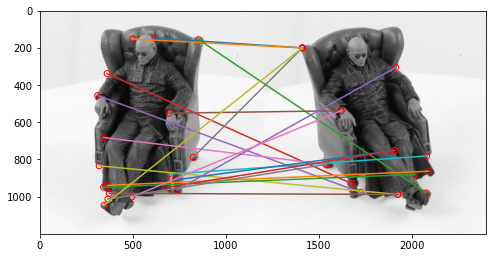

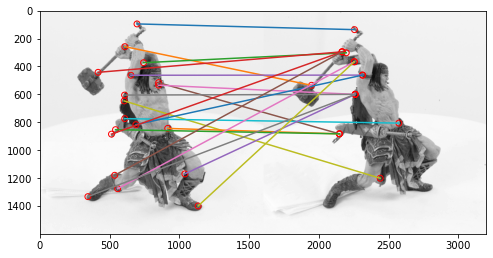

Number of Corners: 30


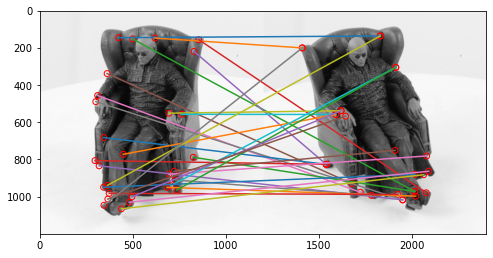

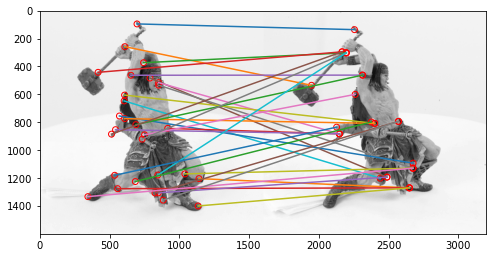

In [1079]:
# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray')
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.show()
    
print("Number of Corners: 10")
show_matching_result(imgs_mat1[0], imgs_mat1[1], matching_mat1)
show_matching_result(imgs_war1[0], imgs_war1[1], matching_war1)

print("Number of Corners: 20")
show_matching_result(imgs_mat2[0], imgs_mat2[1], matching_mat2)
show_matching_result(imgs_war2[0], imgs_war2[1], matching_war2)

print("Number of Corners: 30")
show_matching_result(imgs_mat3[0], imgs_mat3[1], matching_mat3)
show_matching_result(imgs_war3[0], imgs_war3[1], matching_war3)

### Problem 4.4 Matching using epipolar geometry [10 pts]
Next, we will use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners in image1. Then, for each corner, do a line search along the corresponding parallel epipolar line in image2.

Evaluate the NCC score for each point along this line and return the best match (or no match if all scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.

You do not have to run this in both directions. Show your result as in the naive matching part. 

In [1]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence
    """
    
    show_matching_result(img1, img2, corrs)
    

def correspondence_matching_epipole(img1, img2, corners1, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    Returns:
        Matching result to be used in display_correspondence function
    """
    matching = []
    window_size = 2*R+1
    pad = (window_size-1)//2
    n = corners1.shape[0]
    for i in range(n):
        corner1 = np.array(corners1[i])
        x,y = corner1[0],corner1[1]
        ncc_max = 0
        pair = None
        for j in range(-pad, img2.shape[1]-pad+1):
            try:
                corner2 = np.array([x-j,y])
                ncc_score = ncc_match(img1,img2,corner1,corner2,R)
                if ncc_score >= ncc_max:
                    ncc_max = ncc_score
                    pair = (corner1,corner2)
            except ValueError:
                pass
        if ncc_max >= NCCth:
            matching.append(pair)
            corners1[i] = np.array([0,0])
    return matching


In [1194]:
rectified_im1_final, rectified_im2_final = completelyBoundedRectification(src1, src2, 
                                                                          H1_bounded, H2_bounded,
                                                                          min_x1_bounded, 
                                                                          max_x1_bounded, 
                                                                          min_y1_bounded, 
                                                                          max_y1_bounded)


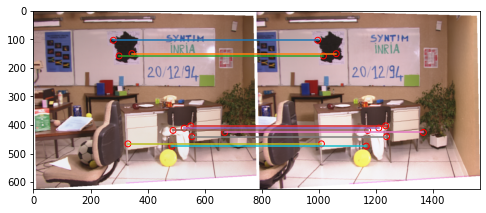

In [1220]:
# replace black pixels with white pixels
_black_idxs = (rectified_im1_final[:, :, 0] == 0) & (rectified_im1_final[:, :, 1] == 0) & (rectified_im1_final[:, :, 2] == 0)
rectified_im1_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]
_black_idxs = (rectified_im2_final[:, :, 0] == 0) & (rectified_im2_final[:, :, 1] == 0) & (rectified_im2_final[:, :, 2] == 0)
rectified_im2_final[:, :][_black_idxs] = [1.0, 1.0, 1.0]

nCorners = 20
# Choose your threshold and NCC matching window radius
NCCth = 0.4
R = 100
windowSize = 17
# detect corners using corner detector here, store in corners1
corners1 = corner_detect(rgb2gray(rectified_im1_final), nCorners, smoothSTD, windowSize)
corrs = correspondence_matching_epipole(rectified_im1_final, rectified_im2_final, corners1, R, NCCth)
display_correspondence(rectified_im1_final, rectified_im2_final, corrs)